### Problem Statement

You are a data scientist / AI engineer working on a classification problem to predict the quality of milk. You have been provided with a dataset named **`"milk_quality_data.csv"`**, which includes various parameters that affect milk quality. The dataset comprises the following columns:

- `ph:` The pH level of the milk.
- `temperature:` The temperature of the milk.
- `taste:` Whether the taste is good or bad (1 for good, 0 for bad).
- `odor:` Whether the odor is good or bad (1 for good, 0 for bad).
- `fat:` Whether the fat content is optimal or not (1 for optimal, 0 for not).
- `turbidity:` Whether the turbidity is high or low (1 for high, 0 for low).
- `colour:` The color value of the milk.
- `grade:` The quality of the milk (low, medium, high).
  
Your task is to use this dataset to build and evaluate machine learning models to predict the grade of the milk based on the given parameters. You will perform data preprocessing, exploratory data analysis, and model training using different algorithms, including logistic regression, decision tree, gradient boosting, and XGBoost.

**Dataset credits:** shrijayan (https://www.kaggle.com/datasets/cpluzshrijayan/milkquality/data)

**Import Necessary Libraries**

In [1]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Task 1: Data Preparation and Exploration

1. Import the data from the `"milk_quality_data.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Check for any missing values in the dataset and handle them appropriately.
5. Encode the target variable `grade` by mapping it to numbers `(low = 0, medium = 1, high = 2)`.
6. Visualize the distribution of key features `(ph, temperature)` using histograms.

In [2]:
# Step 1: Import the data from the "milk_quality_data.csv" file and store it in a variable 'df'
df = pd.read_csv("milk_quality_data.csv")

# Step 2: Display the number of rows and columns in the dataset
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# Step 3: Display the first few rows of the dataset to get an overview
df.head()

Number of rows: 1059
Number of columns: 8


,ph,temperature,taste,odor,fat,turbidity,colour,grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [3]:
# Step 4: Check for any missing values in the dataset and handle them appropriately
df.isnull().sum()

,0
ph,0
temperature,0
taste,0
odor,0
fat,0
turbidity,0
colour,0
grade,0


In [4]:
# Step 5: Encode the target variable 'grade' by mapping it to numbers ('low' = 0, 'medium' = 1, 'high' = 2)
df['grade'] = df['grade'].map({'low': 0, 'medium': 1, 'high': 2})
df.head()

,ph,temperature,taste,odor,fat,turbidity,colour,grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


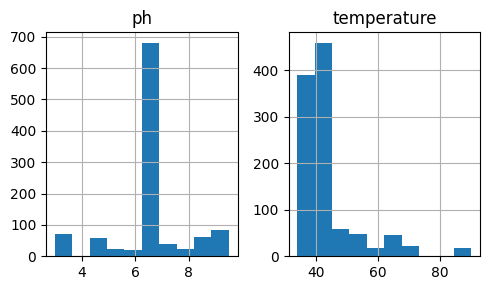

In [10]:
# Step 6: Visualize the distribution of key features ('ph', 'temperature') using histograms
df[['ph', 'temperature']].hist(figsize=(5, 3))
plt.tight_layout()
plt.show()

### Task 2: Model Training Using Basic Models

1. Select the features `(ph, temperature, taste, odor, fat, turbidity, colour)` and the target variable `(grade)` for modeling.
2. Split the data into training and test sets with a test size of 30%.
3. Initialize and train a Logistic Regression model using the training data.
4. Print the model's accuracy score on test data.
5. Initialize and train a Decision Tree Classifier using the training data.
6. Print the model's accuracy score on test data.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 1: Select the features and target variable for modeling
X = df[['ph', 'temperature', 'taste', 'odor', 'fat', 'turbidity', 'colour']]
y = df['grade']


# Step 2: Split the data into training and test sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [27]:
# Step 3: Initialize and train a Logistic Regression model using the training data
import time

start = time.time()
model_lr = LogisticRegression(max_iter=8000)
model_lr.fit(X_train, y_train)
end = time.time()

y_pred = model_lr.predict(X_test)

# Step 4: Print the model's accuracy score on test data.
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Time taken by Logistic Regression: ", end - start)

Accuracy Score:  0.8553459119496856
Time taken by Logistic Regression:  2.441990613937378


In [35]:
# Step 5: Initialize and train a Decision Tree Classifier using the training data

start = time.time()
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train, y_train)
end = time.time()

y_pred = model_dtc.predict(X_test)

# Step 6: Print the model's accuracy score on test data.
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Time taken by Decision Tree Classifier: ", end - start)

Accuracy Score:  0.9937106918238994
Time taken by Decision Tree Classifier:  0.004527568817138672


### Task 3: Model Training Using Advanced Models

1. Initialize and train a Gradient Boosting Classifier with 50 estimators using the training data.
2. Print the model's accuracy score on test data.
3. Initialize and train an XGBoost Classifier with 50 estimators using the training data.
4. Print the model's accuracy score on test data.

In [30]:
# Step 1: Initialize and train a Gradient Boosting Classifier with 50 estimators using the training data
from sklearn.ensemble import GradientBoostingClassifier

start = time.time()
model_gbc = GradientBoostingClassifier(n_estimators=50)
model_gbc.fit(X_train, y_train)
end = time.time()

y_pred = model_gbc.predict(X_test)

# Step 2: Print the model's accuracy score
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Time taken by Gradient Boosting Classifier: ", end - start)

Accuracy Score:  0.9905660377358491
Time taken by Gradient Boosting Classifier:  0.21881413459777832


In [33]:
# Step 3: Initialize and train an XGBoost Classifier with 50 estimators using the training data
import xgboost as xgb

start = time.time()
model_xgb = xgb.XGBClassifier(n_estimators=50)
model_xgb.fit(X_train, y_train)
end = time.time()

y_pred = model_xgb.predict(X_test)

# Step 4: Print the model's accuracy score
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Time taken by XGBoost Classifier: ", end - start)

Accuracy Score:  0.9968553459119497
Time taken by XGBoost Classifier:  0.0472104549407959


### Task 4: Experiment with Hyperparameters in XGBoost

1. Train the XGBoost model with the following parameters
    - n_estimators=100
    - max_depth=5
    - learning_rate=0.1
    - colsample_bytree=0.5.

Learn about these parameters here: [XgboostClassifier Parameters](https://xgboost.readthedocs.io/en/stable/parameter.html)

--------------------------------------------------------------------------------------------------------------------------------------------------------

2. Evaluate the model's performance using accuracy score and print it.
3. Print the classification report and confusion matrix for the model.

In [40]:
# Step 1: Train the XGBoost model with n_estimators=100, max_depth=5, learning_rate=0.1, colsample_bytree=0.5
start = time.time()
model_xgb = xgb.XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, colsample_bytree=0.5)
model_xgb.fit(X_train, y_train)
end = time.time()

y_pred = model_xgb.predict(X_test)

# Step 2: Evaluate the model's performance using accuracy score and print it
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Time taken by XGBoost Classifier: ", end - start)

Accuracy Score:  0.9968553459119497
Time taken by XGBoost Classifier:  0.07444000244140625


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       115
           1       1.00      1.00      1.00       127
           2       0.99      1.00      0.99        76

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318



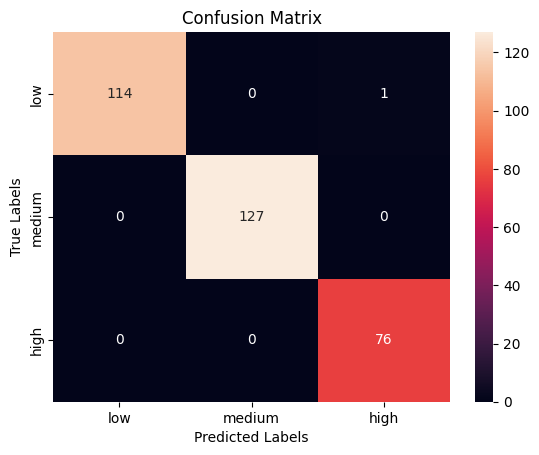

In [41]:
# Step 3: Print the classification report and confusion matrix for the model
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['low', 'medium', 'high'], columns=['low', 'medium', 'high'])
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
